Feature rank:
1. feature 306 (0.013411)
2. feature 117 (0.011097)
3. feature 265 (0.008002)
4. feature 228 (0.007035)
5. feature 1638 (0.006078)
6. feature 95 (0.006050)
7. feature 1497 (0.005857)
8. feature 740 (0.005746)
9. feature 877 (0.005639)
10. feature 314 (0.005220)
11. feature 1667 (0.005106)
12. feature 1641 (0.004970)
13. feature 224 (0.004953)
14. feature 132 (0.004919)
15. feature 226 (0.004915)
16. feature 1677 (0.004862)
17. feature 735 (0.004632)
18. feature 275 (0.004620)
19. feature 1503 (0.004597)
20. feature 800 (0.004587)
21. feature 267 (0.004552)
22. feature 1675 (0.004538)
23. feature 276 (0.004491)
24. feature 1684 (0.004358)
25. feature 837 (0.004330)
26. feature 168 (0.004321)
27. feature 1668 (0.004195)
28. feature 262 (0.004146)
29. feature 1701 (0.004082)
30. feature 133 (0.003952)
31. feature 1682 (0.003947)
32. feature 202 (0.003931)
33. feature 1493 (0.003927)
34. feature 1680 (0.003915)
35. feature 1647 (0.003890)
36. feature 264 (0.003808)
37. featur

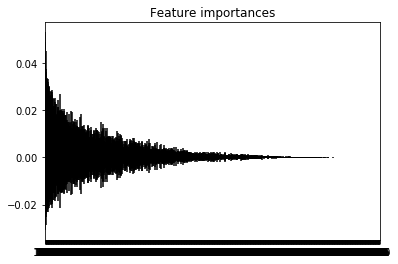

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

dataset=pd.read_csv('../Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv')
label=dataset.pop('Class')
data=dataset

# Build a classification task using 3 informative features
x, y = data,label

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature rank:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()